In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

# Se hace arreglo con datos experimentales de Absorbancia $A$ Vs longitud de onda $\lambda$ y de ajustan valores para todos los calculos y nombres de archivos

#### ESTE CODIGO ESTA HECHO PARA QUE LA PERSONA FIJE MIRANDO LAS GRAFICAS LOS VALORES QUE DEJA Y DESPRECIA DE LOS DATOS DE
#### ABSORVANCIA Vs LONG. DE ONDA CON las variables numEleEmp y numEleTer
#### Y TAMBIEN PENSANDO QUE MIRADO LAS GRAFICAS LA PERSONA ESCOGE ENTRE QUE PUNTOS EN LA GRAFICA DE
#### RELACI0N DE TAUC Vs ENERGIA DE LA LUZ INCIDENTE SE ESCOGE LA ZONA ADECUADA MEDIANTE LAS VARIABLES 

#### Poner archivo de datos experiemtnales Absorbancai Vs Long onda correcto

#-------

Entre estos simbolos estan las variables que por favor uno escoge a mano

#-------

In [15]:
#----------------------------------
#variables
Tcal="Simulation" #por favor mantener ###°C
PorVac="5.0% Ox. Vacancies" #Pristina: "Pristine Structure" ; 2.5%VacanOxi:"2.5% Ox. Vacancies" ; 5.0%VacanOxi:"5.0% Ox. Vacancies"
#numEleEmp=138 #el numero de elementos desde el que se usan datos abosorbancia Vs long de onda o Relación Tauc Vs Energia luz laser
#numEleTer=200 #el numero de elementos hasta donde se usan datos abosorbancia Vs long de onda o Relación Tauc Vs Energia luz laser
#PARA LA RELACION DE TAUC VS ENERGÍA DE LA LUZ LASER INCIDENTE A LA MUESTRA
#indTaucIni sin saltos no deseados: 400°C:120 425°C:120 438°C:115 450°C:105 475°C:120 500°C:85
indTaucIni=2380 #Pristina: 2138 o 2860; 2.5%: 2847; 5.0%: 2380 
numFilQuita=13
indTaucFin=200 #tal vez no se usa
expRelTauc=2 # 2 (int) o 1/2 por favor exponenete de relación de Tauc para Tauc Plot que depende del material y como la transicion
groRelTauc=1.0 #el grosor en cm del recipiente que atraviesa el haz laser en la muestra al medir la absorbancia Vs Long. ond
Fecha="2021_M9_16_" #"2021_M4_5_"
expStr=str(expRelTauc)
ZonEneStr="BajEnergias" #"BajEnergias" ; "MedEnergias" o "AltEnergias"
Formato=".png" #"png" o "pdf"
guardar=False
guardarSimu=True
#exponente en string para nombre de archivos, transiciones Tauc Plot en https://pubs.acs.org/doi/pdf/10.1021/acscombsci.6b00053
expNom=""
if expRelTauc==2:
    expNom="exp2_0"
    print("Direct allowed transition")
elif expRelTauc==0.5:
    expNom="exp0_5"
    print("Inirect allowed transition")
elif expRelTauc==3/2:
    expNom="exp1_5"
    print("VerifyIndirect forbidden transition")
elif expRelTauc==3:
    expNom="exp3_0"
    print("VerifyDirect forbidden transition")
else:
    print("Exponente no concuerda con alguna transicion")
#------------------------------------------

#Se hace arreglo con datos experimentales de Absorbancia A Vs longitu de onda lambda
absVsLonOnda_lonDisminyendo=np.loadtxt("2021_M4_4_EspectrosSimuladosV2O5_Sergio_AbsVsLonOnda_5,0%Vacan_Puntos.txt", skiprows=numFilQuita, delimiter=";")#absVsLonOnda=np.loadtxt("2019_Mes9_6_V2O5_425C_No_acuosa_Abs.csv", skiprows=2, delimiter=";")
absVsLonOnda=absVsLonOnda_lonDisminyendo[::-1]
Energia=1240.0/absVsLonOnda[:, 0] #Energia=1240.0/absVsLonOnda[numEleEmp:, 0]
relTauc=( ( (2.303/groRelTauc)*absVsLonOnda[:, 1])*Energia  )**expRelTauc #relTauc=( ( 2.303*absVsLonOnda[numEleEmp:, 1])*Energia  )

print("np.shape(absVsLonOnda)=", np.shape(absVsLonOnda), "absVsLonOnda=", absVsLonOnda)
print("Energia es", Energia, "con np.shape de", np.shape(Energia), "y elemento donde se empieza de este arreglo de energía es", indTaucIni, "con valor de energia de", Energia[indTaucIni])
print("relTauc es", relTauc, "con np.shape de", np.shape(relTauc), "y elemento donde se empieza de este arreglo de realcion de Tauc es", indTaucIni, "con valor de realcion de tauc de", relTauc[indTaucIni])
print("Energia[indTaucIni:] usado tiene np.shape de", np.shape(Energia[indTaucIni:]))
print("relTauc[indTaucIni:] usado tiene np.shape de", np.shape(relTauc[indTaucIni:]))
#print("derRelTaucY con np.shape de", np.shape(derRelTaucY),"es", derAbsY)
print("Energia[indTaucIni:]=", Energia[indTaucIni:], "con np.shape", np.shape(Energia[indTaucIni:]))
print("relTauc[indTaucIni:]=", relTauc[indTaucIni:])
#print("derRelTaucY[indTaucIni:] es", derRelTaucY[indTaucIni:], "np.shape", np.shape(derRelTaucY[indTaucIni:]))
#print("Energia", "debe dar primero", 1240.0/absVsLonOnda[numEleEmp, 0], "verifica aqui", Energia)
#print("RelTauc debe dar primero", ( (2.303*absVsLonOnda[numEleEmp, 1])*Energia[0]  ), "y da", relTauc)


Direct allowed transition
np.shape(absVsLonOnda)= (2491, 2) absVsLonOnda= [[9.7830715e+00 6.5600000e+02]
 [9.7869868e+00 1.9700000e+03]
 [9.7908976e+00 1.9700000e+03]
 ...
 [1.7484726e+03 8.5400000e+04]
 [1.8828275e+03 8.4300000e+04]
 [2.0398847e+03 8.3100000e+04]]
Energia es [126.74955917 126.69885281 126.6482452  ...   0.70919041   0.65858396
   0.60787749] con np.shape de (2491,) y elemento donde se empieza de este arreglo de energía es 2380 con valor de energia de 6.180387775472094
relTauc es [3.66681053e+10 3.30419518e+11 3.30155610e+11 ... 1.94549145e+10
 1.63480264e+10 1.35338716e+10] con np.shape de (2491,) y elemento donde se empieza de este arreglo de realcion de Tauc es 2380 con valor de realcion de tauc de 2233034809115406.8
Energia[indTaucIni:] usado tiene np.shape de (111,)
relTauc[indTaucIni:] usado tiene np.shape de (111,)
Energia[indTaucIni:]= [6.18038778 6.12978151 6.07907504 6.02846867 5.97776205 5.92715555
 5.87644917 5.82584282 5.77513622 5.72452972 5.67382325 5.62

# Grafica de absrobancias Vs Longitud de onda

<IPython.core.display.Javascript object>


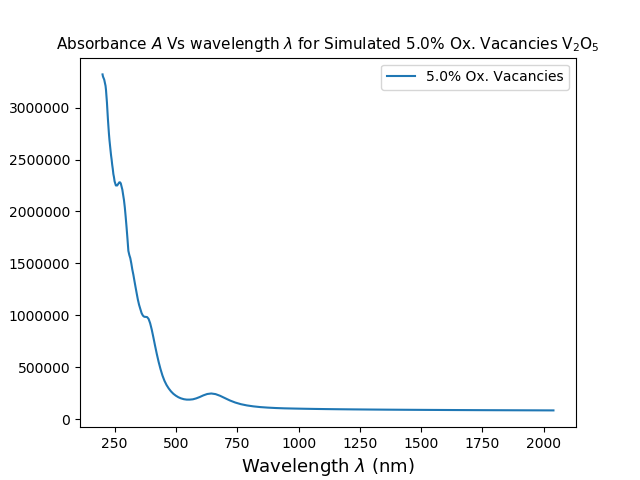

In [16]:
plt.figure()
plt.plot(absVsLonOnda[indTaucIni:, 0], absVsLonOnda[indTaucIni:, 1], label=PorVac)
plt.title("Absorbance "+r"$A$"+" Vs wavelength "+r"$\lambda$"+" for Simulated "+PorVac+" "+r"V$_{2}$O$_{5}$", size=11)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=13)
plt.ylabel(r"Absorbance $A$", size=13)
plt.legend(loc=0)
plt.savefig(Fecha+"V2O5NoAcu_AbsorbanciaVsLongOnda_"+Tcal+PorVac[:4]+Formato)

# Grafica de relacion de Tauc Vs energia y de su primera derivada respecto a (hf)

<IPython.core.display.Javascript object>


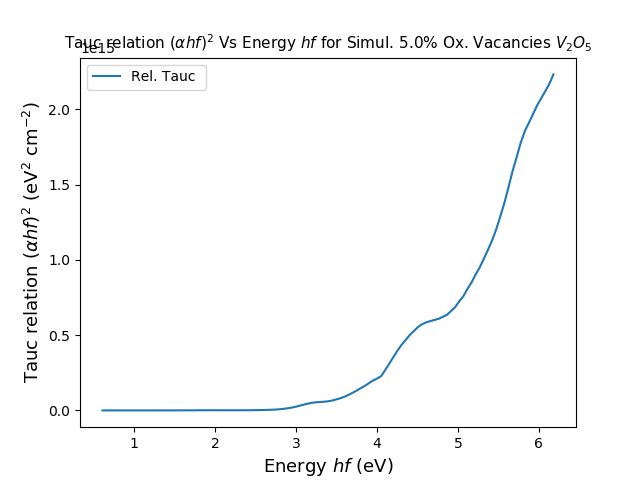

<IPython.core.display.Javascript object>


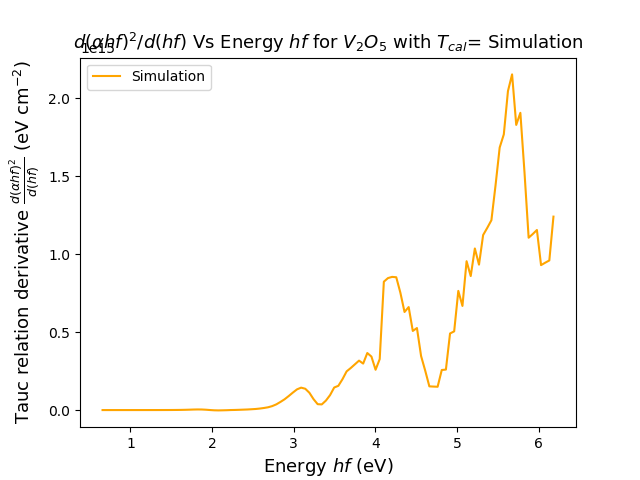

In [17]:
plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Rel. Tauc ")
#BORRADOR PARA VER DERIVADA DE REL TAUC VS ENERGIA
#plt.scatter(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label="$derTauc$", color="orange")#Energia[indTaucIni:-1] va hasta -1 porque derRelTaucY[indTaucIni:] para tener el mismo NO de elementos que la derivada 
plt.title("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs Energy $hf$ for Simul. "+PorVac+" "+"$V_{2}O_{5}$", size=11)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0)
#plt.xlim(0.0, 4.0)
#plt.ylim(-0.5, 20.0)
plt.savefig(Fecha+"V2O5AVsLambdaSimul_RelTaucPlotVsEnergiaLuzLaser_"+PorVac[:4]+expNom+ZonEneStr+Formato)
#plt.show()

#Grafica de derivada 1 de la rel. Tauc resp. (hf)
derRelTaucY=np.diff(relTauc)/np.diff(Energia)
plt.figure()
plt.plot(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label=Tcal, color="orange")
plt.title(r"$d(\alpha hf)^{"+expStr+r"}/d(hf)$"+" Vs Energy $hf$ for $V_{2}O_{5}$ with $T_{cal}$= "+Tcal, size=13)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation derivative "+r"$\frac{d(\alpha hf)^{"+expStr+r"}}{d(hf)}$"+" (eV cm$^{-2}$)", size=13)
plt.legend(loc=0)
plt.show()

# Ajuste lineal a relación de Tauc Vs energía
### Por favor colocar indices [ indLinIni, indLinFin ] entre 0 y indTaucIni con:

In [18]:
print("indTaucIni=", indTaucIni, "y maximo poner", np.shape(Energia))

indTaucIni= 2380 y maximo poner (2491,)


In [19]:
#-----------------------------------------------
#Las siguientes dos constates con indices deben encerrar la zona de  interes para el ajuste lineal por Tauc Plot
indLinIni=indTaucIni+85 #250 #230 #indice para hacer el ajuste lineal por Tauc Plot INICIAL
indLinFin=indTaucIni+105 #500 #275  #indice para hacer el ajuste lineal por Tauc Plot FINAL
marco=1.3 #distancia de borde alrededor regre. lin.
completo=True #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
limVerdes=True #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
numPunAjuLinTauc=10 #numero puntos ajuste lineal para tuac plot
#-----------------------------------------------


#PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER EAJUDTE LINEAL TAUC PLOT
indLinIniMej=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
linTaucXMej=[]
linTaucYMej=[]
#variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
slopeTaucMej=0.0
interceptTaucMej=0.0
r_valueTaucMej=0.0 # valor de r para ajuste lienal de relacion de Tauc optimizado el del mejor resultado
p_valueTaucMej=0.0

std_errTaucMej=0.0
"""
staErrSlopeTaucMej=0.0
staErrIntTaucMej=0.0
"""

for i in range( indLinIni, indLinFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
    linTaucXPos=Energia[i:(i+numPunAjuLinTauc)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
    linTaucYPos=relTauc[i:(i+numPunAjuLinTauc)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
    
    slopeTaucPos, interceptTaucPos, r_valueTaucPos, p_valueTaucPos, std_errTaucPos = stats.linregress(linTaucXPos, linTaucYPos)
    """
    #Regresion lineal ideal posiblemente
    regLinPos=stats.linregress(linTaucXPos, linTaucYPos)
    #Variables de la regresion lineal ideal posible
    slopeTaucPos=regLinPos.slope
    interceptTaucPos=regLinPos.intercept
    r_valueTaucPos=regLinPos.rvalue
    p_valueTaucPos=regLinPos.pvalue
    staErrSlopeTaucPos=regLinPos.stderr
    staErrIntTaucPos=regLinPos.intercept_stderr
    """
    
    if i == indLinIni:
        indLinIniMej=i 
        linTaucXMej=linTaucXPos
        linTaucYMej=linTaucYPos
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMej=slopeTaucPos
        interceptTaucMej=interceptTaucPos
        r_valueTaucMej=r_valueTaucPos
        p_valueTaucMej=p_valueTaucPos
        
        std_errTaucMej=std_errTaucPos
        """
        staErrSlopeTaucMej=staErrSlopeTaucPos
        staErrIntTaucMej=staErrIntTaucPos
        """
    
    elif r_valueTaucPos >= r_valueTaucMej:
        indLinIniMej=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
        linTaucXMej=linTaucXPos
        linTaucYMej=linTaucYPos
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMej=slopeTaucPos
        interceptTaucMej=interceptTaucPos
        r_valueTaucMej=r_valueTaucPos
        p_valueTaucMej=p_valueTaucPos
       
        std_errTaucMej=std_errTaucPos
        """
        staErrSlopeTaucMej=staErrSlopeTaucPos
        staErrIntTaucMej=staErrIntTaucPos
        """
        
#Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
# estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
ajuTaucXMej=np.linspace(-interceptTaucMej/slopeTaucMej, Energia[indLinIniMej], 1000) #Diosito por mediante mejoralos Danito bello!!!
ajuTaucYMej=( slopeTaucMej*ajuTaucXMej )+interceptTaucMej
gapOptLin=-interceptTaucMej/slopeTaucMej
gapOptLinStr=str(gapOptLin)[:4]+"eV"

## Ahora gráfica Rel Tauc Vs energía con ajuste lineal

Empieza en indLinIniMej= 2485 y termina en 2494 tomando 10 puntos.
Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado= 0.42186597107777585 +- error standar de la pendiente de 2721111663.445858


<IPython.core.display.Javascript object>


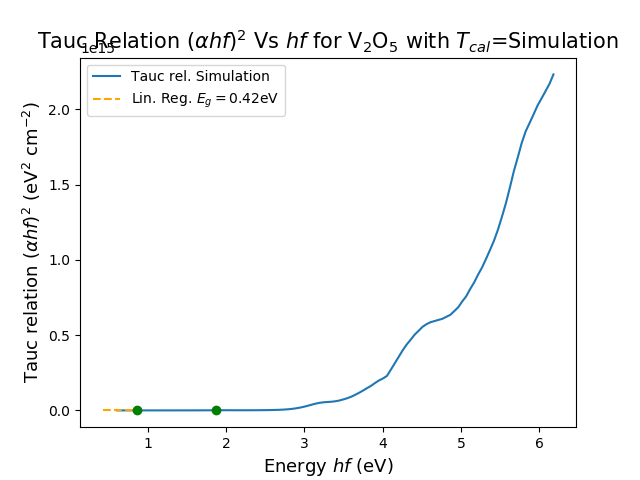

In [20]:
print("Empieza en indLinIniMej=", indLinIniMej, "y termina en", indLinIniMej+numPunAjuLinTauc-1, "tomando", numPunAjuLinTauc, "puntos.")
print("Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado=", -interceptTaucMej/slopeTaucMej, "+- error standar de la pendiente de", std_errTaucMej)

plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Tauc rel. "+Tcal)
plt.plot(ajuTaucXMej, ajuTaucYMej, "--", color="orange", label="Lin. Reg. "+r"$E_{g}=$"+gapOptLinStr)
if limVerdes==True:
    plt.plot( [Energia[indLinIni], Energia[indLinFin]], [relTauc[indLinIni], relTauc[indLinFin]], 'o', color='green' )
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs $hf$ for V$_{2}$O$_{5}$ with $T_{cal}$="+Tcal, size=15)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0)
if completo==False:
    plt.xlim(ajuTaucXMej[0]-marco, ajuTaucXMej[-1]+marco)
    plt.ylim(ajuTaucYMej[0], ajuTaucYMej[-1]+marco)    
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+Tcal+PorVac+expNom+ZonEneStr+Formato)

# Regresión lineal alrededor de punto donde es máxima la derivada 1 filtrada con Savitzky Golay

<IPython.core.display.Javascript object>


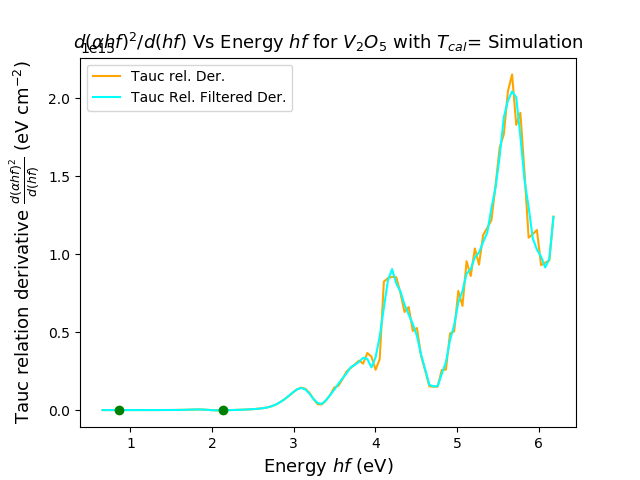

In [21]:
from scipy.signal import savgol_filter

#----------------
numPunAjuLinTaucFil=1 #numero puntos ajuste lineal para tuac plot BajEnergias:10 AltEnergias:indTaucIni+85
indTaucFilIni=indTaucIni+80 #80 #AltEnergias2_0:indTaucIni+70 ; BajEnergias2_0:indTaucIni+90 ; AltEnergias0_5:indTaucIni+70 ; BajEnergias0_5:indTaucIni+90
indTaucFilFin=indTaucIni+105 #AltEnergias2_0:indTaucIni+90 : BajEnergias2_0:indTaucIni+110 ; AltEnergias0_5:indTaucIni+90 ; BajEnergias0_5:indTaucIni+105
limVerdesFil=True
completoFil=False
punExtAjuTauc=4 #30
tamVanFilSG=7
#----------------

#Derivada 1 de la rel. de Tauc en [indTaucIni:] para evitar nans y errores con filtro SG
derRelTaucY=np.diff(relTauc[indTaucIni:])/np.diff(Energia[indTaucIni:]) #derRelTaucY=np.diff(relTauc)/np.diff(Energia)
#Verificar que derRelTaucY no tenga nans que arrojen error LinAlgError: SVD did not converge in Linear Least Squares
#print("derRelTaucY=", derRelTaucY)
#Derivada 1 de rel. de Tauc filtrada/suavizada 
derRelTaucY_filSG=savgol_filter(derRelTaucY, tamVanFilSG, 3)

#Grafica de derivada 1 de la rel. Tauc resp. (hf)
#{np.shape(derRelTaucY)=np.shape(Energia[indTaucIni:-1])=np.shape(derRelTaucY_filSG)}
plt.figure()
plt.plot(Energia[indTaucIni:-1], derRelTaucY, label="Tauc rel. Der.", color="orange") #plt.plot(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label="Tauc rel. Der.", color="orange")
plt.plot(Energia[indTaucIni:-1], derRelTaucY_filSG, label="Tauc Rel. Filtered Der.", color="cyan") #plt.plot(Energia[indTaucIni:-1], derRelTaucY_filSG[indTaucIni:], label="Tauc Rel. Filtered Der.", color="cyan")
if limVerdesFil==True:
    plt.plot( [Energia[indTaucFilIni], Energia[indTaucFilFin]], [relTauc[indTaucFilIni], relTauc[indTaucFilFin]], 'o', color='green' )
plt.title(r"$d(\alpha hf)^{"+expStr+r"}/d(hf)$"+" Vs Energy $hf$ for $V_{2}O_{5}$ with $T_{cal}$= "+Tcal, size=13)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation derivative "+r"$\frac{d(\alpha hf)^{"+expStr+r"}}{d(hf)}$"+" (eV cm$^{-2}$)", size=13)
plt.legend(loc=0)
plt.show()

Empieza en indLinIniMejFil= 2466 y termina en 2466 tomando 1 puntos.
Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado= 1.5967770339897813
El indice donde la derivada de la rel. de Tauc es maxima y su correspondeinte valor de enrgia son resp. 2466 1.8237324897413578


<IPython.core.display.Javascript object>


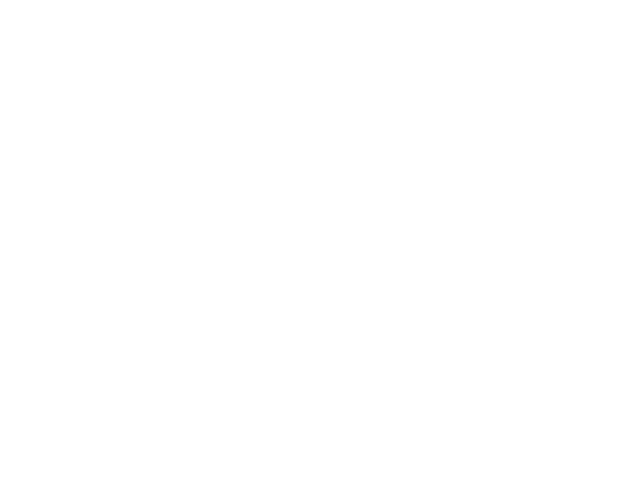

In [9]:
#Se calcula el maximo de la derivada de la rel. de Tauc filtrada entre [indTaucFilIni,indTaucFilFin]
#derTaucY_fil_indMax=np.argmax( derRelTaucY_filSG[indTaucFilIni,indTaucFilFin+1] )

marcoYFil=0.1e13 #BajEnergias:0.7 #distancia de borde alrededor regre. lin.
marcoXFil=0.7 #Para marco horizontal diferente al vertical  (0.0 normalmente)
completoFil=False #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
limVerdesFil=False #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
PunRojReg=False #True: se muestran los puntos optimizados con for para reg. lineal, False: no se muestran
#-----------------------------------------------


#PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER EAJUDTE LINEAL TAUC PLOT
indLinIniMejFil=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
linTaucXMejFil=[]
linTaucYMejFil=[]
#variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
slopeTaucMejFil=0.0
interceptTaucMejFil=0.0
r_valueTaucMejFil=0.0 # valor de r para ajuste lienal de relacion de Tauc optimizado el del mejor resultado
p_valueTaucMejFil=0.0
std_errTaucMejFil=0.0
#Derivada maxima o mejorada que se verifica en for
derRelTaucY_filSGMej=0.0

for i in range( indTaucFilIni, indTaucFilFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
    linTaucXPosFil=Energia[(i-numPunAjuLinTaucFil):(i+numPunAjuLinTaucFil+1)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
    linTaucYPosFil=relTauc[(i-numPunAjuLinTaucFil):(i+numPunAjuLinTaucFil+1)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
    
    slopeTaucPosFil, interceptTaucPosFil, r_valueTaucPosFil, p_valueTaucPosFil, std_errTaucPosFil = stats.linregress(linTaucXPosFil, linTaucYPosFil)
    
    if i == indTaucFilIni:
        indLinIniMejFil=i 
        linTaucXMejFil=linTaucXPosFil
        linTaucYMejFil=linTaucYPosFil
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMejFil=slopeTaucPosFil
        interceptTaucMejFil=interceptTaucPosFil
        r_valueTaucMejFil=r_valueTaucPosFil
        p_valueTaucMejFil=p_valueTaucPosFil
        std_errTaucMejFil=std_errTaucPosFil
        #Derivaada maxima se define por el momento al menos
        derRelTaucY_filSGMej=derRelTaucY_filSG[i-indTaucIni]
    
    elif derRelTaucY_filSG[i-indTaucIni] >= derRelTaucY_filSGMej:
        indLinIniMejFil=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
        linTaucXMejFil=linTaucXPosFil
        linTaucYMejFil=linTaucYPosFil
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMejFil=slopeTaucPosFil
        interceptTaucMejFil=interceptTaucPosFil
        r_valueTaucMejFil=r_valueTaucPosFil
        p_valueTaucMejFil=p_valueTaucPosFil
        std_errTaucMejFil=std_errTaucPosFil
        #Derivaada maxima se define por el momento al menos
        derRelTaucY_filSGMej=derRelTaucY_filSG[i-indTaucIni]
     
    #Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
# estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
NumPunGrafTaucVsEne=len(Energia[indTaucIni:])
ajuTaucXMejFil=np.linspace(-interceptTaucMejFil/slopeTaucMejFil, Energia[indLinIniMejFil-punExtAjuTauc], NumPunGrafTaucVsEne) #Diosito por mediante mejoralos Danito bello!!!
ajuTaucYMejFil=( slopeTaucMejFil*ajuTaucXMejFil )+interceptTaucMejFil
gapOptLinFil=-interceptTaucMejFil/slopeTaucMejFil
gapOptLinFilStr=str(gapOptLinFil)[:4]+"eV"

#Se grafica la rel. de Tauc con este ajuste lineal
print("Empieza en indLinIniMejFil=", indLinIniMejFil, "y termina en", indLinIniMejFil+numPunAjuLinTaucFil-1, "tomando", numPunAjuLinTaucFil, "puntos.")
print("Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado=", gapOptLinFil)
print("El indice donde la derivada de la rel. de Tauc es maxima y su correspondeinte valor de enrgia son resp.", indLinIniMejFil, Energia[indLinIniMejFil])

plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Tauc rel. "+PorVac)
plt.plot(ajuTaucXMejFil, ajuTaucYMejFil, "--", color="orange", label="Lin. Reg. "+r"$E_{g}=$"+gapOptLinFilStr)
if limVerdesFil==True:
    plt.plot( [Energia[indTaucFilIni], Energia[indTaucFilFin]], [relTauc[indTaucFilIni], relTauc[indTaucFilFin]], 'o', color='green', markersize=7 )
if PunRojReg==True:
    plt.scatter( linTaucXMejFil, linTaucYMejFil, color="red" )
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs $hf$ for Simulated V$_{2}$O$_{5}$ ("+PorVac[:4]+")", size=11.5)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0, fontsize="x-large") #x-large
if completoFil==False:
    plt.xlim(ajuTaucXMejFil[0]-marcoXFil, ajuTaucXMejFil[-1]+marcoXFil) #plt.xlim(ajuTaucXMejFil[0]-marcoFil-marcoXFil, ajuTaucXMejFil[-1]+marcoFil+marcoXFil)
    plt.ylim(ajuTaucYMejFil[0], ajuTaucYMejFil[-1]+marcoYFil) #plt.ylim(ajuTaucYMejFil[0], ajuTaucYMejFil[-1]+marcoFil)    
plt.savefig(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLinFiltraStravitzkyGolay_"+Tcal+PorVac[:4]+expNom+ZonEneStr+Formato)

# Variación de gap de energía Eg con número de puntos de la regresión lineal

#2020_M5_4: 

#Escogemos puntos inicial y final para entre ellos seleccionando ciertos puntos ir calculando el 
#gap de energia optico, son enteros int porque son indices 
numPun=40 #10
indPunIni=280#257-30 #257
indPunFin=indPunIni+numPun

#con un for vamos llenando 2 arreglos con el gap de energia optico Vs No. puntos de la regresión usada
gapEneOpt=[]
numPunRegLinTauc=[]

for i in range( 2, numPun+1 ): #empieza en 2 y no en 1 porque en EneDada y relTaucDada si no es asi al inicio cada arreglo queda  de solo 1 elemento y no se le saca asi reg. lineal
    EneDada=Energia[indPunIni:(indPunIni+i)]
    relTaucDada=relTauc[indPunIni:(indPunIni+i)]
    slopeTaucDada, interceptTaucDada, r_valueTaucDada, p_valueTaucDada, std_errTaucDada = stats.linregress(EneDada, relTaucDada)
    gapEneOpt.append( (-interceptTaucDada)/slopeTaucDada )
    numPunRegLinTauc.append( float(i) )

print("indPunFin=", indPunFin, "indPunIni", indPunIni, "indPunFin-indPunIni=", indPunFin-indPunIni)
#print("Energia[indTaucIni:(indPunFin+1)]=", Energia[indTaucIni:(indPunFin+1)])

#graficamos gap de energia optico (varios valores) Vs No puntos de regresion lineal
plt.figure()
plt.plot(numPunRegLinTauc, gapEneOpt, 'o-')
plt.title(r"$E_{g}$"+" Vs Number of Points for "+r"V$_{2}$O$_{5}$ ($T_{cal}="+Tcal+")")
plt.xlabel("Number of points for the linear regresion", size=13)
plt.ylabel(r"Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.legend(loc=0)
#plt.grid()
plt.show()
#plt.savefig("2020_M5_6_V2O5NoAcu400C_GapEneOptVsNoPunsRegLinTaucPlot.pdf")


# 2020_M8_26: Considerando todos las posibles combinaciones de numero de puntos para la regresion (i) a la vez que para cada i todos los indices desde los que empieza a la izquierda en una grafica la regresion los i puntos dados

In [22]:
import math
#------------------------------------
#Escogemos puntos inicial y final para entre ellos seleccionando ciertos puntos ir calculando el 
#gap de energia optico, son enteros int porque son indices 
numPunRegIni=2 #BajEnergias:10
numPun=170 #40 #50 #es el numero de puntos maximo usado en las regresiones
numPunIni=20 #300 #90 #50 #Variable int usada para graficar en contorno y 3D
indPunIni=indTaucIni #BajEnergias:230
indPunFin=indPunIni+numPunIni #indPunFin=indPunIni+numPun
#------------------------------------

#arreglo cuyo indice de filas es el numero de puntos para la regresion lineal
#y cuyo indice de columna da el numero o indice desde el que se incia la regresion dada el numero de puntos dado por i
#esta lleno de ceros en principio y se llenara este arreglo con los siguientes for
gapEneOpt2D=np.zeros((numPun-numPunRegIni+1, numPunIni)) #np.zeros((numPun-1, numPunIni))
print("np.shape(gapEneOpt2D)", np.shape(gapEneOpt2D))
#print("gapEneOpt2D=", gapEneOpt2D)

arrNumPunReg=[]
arrPunIni=[]
arrGabEneOpt=[]

for i in range( numPunRegIni, numPun+1 ): #empieza en 2 y no en 1 porque en EneDada y relTaucDada si no es asi al inicio cada arreglo queda  de solo 1 elemento y no se le saca asi reg. lineal
    for j in range( indPunIni, (indPunFin) ): #for j in range( indPunIni, (indPunFin+1) ):
        EneDada=Energia[(j-( math.floor(i/2) )):(j+ ( math.ceil(i/2) ) )] #EneDada=Energia[j:(j+i)]
        relTaucDada=relTauc[(j-( math.floor(i/2) )):(j+ ( math.ceil(i/2) ) )] #relTaucDada=relTauc[j:(j+i)]
        #Util si linregress arroja error de que se le pone arreglo vacio para ver donde esta el (i,j) de arreglo vacio
        #print( "i=", i, "j=", j, "np.shape(EneDada)=", np.shape(EneDada), "np.shape(relTaucDada)=", np.shape(relTaucDada) )
        slopeTaucDada, interceptTaucDada, r_valueTaucDada, p_valueTaucDada, std_errTaucDada = stats.linregress(EneDada, relTaucDada)
        arrNumPunReg.append( i )
        arrPunIni.append( j )
        arrGabEneOpt.append( (-interceptTaucDada)/slopeTaucDada )
        #para poner el gap de enrgia optico en matriz 2x2 tambien
        j_movido=j-indPunIni#j-indPunIni-1 #ALGO RARO Y TAL VEZ PARA CORREGIR
        i_movido=i-numPunRegIni
        #se pone el gap de enrgia optico en matriz de 2x2 tambien
        gapEneOpt2D[i_movido, j_movido]=(-interceptTaucDada)/slopeTaucDada

np.shape(gapEneOpt2D) (169, 20)


# Gráfica 3D puntos z=Eg(hf_Inicio,NúmPuntosRegLin)
#### Para hacer el grafico en 3 dimensiones se usa esta celda de código y las Referencias utiles:
#### https://www.youtube.com/watch?v=6ljHxJQ47Uk ; https://www.youtube.com/watch?v=Zv9a_wMJMe4 ; https://www.youtube.com/watch?v=wJQIGXSq504

<IPython.core.display.Javascript object>


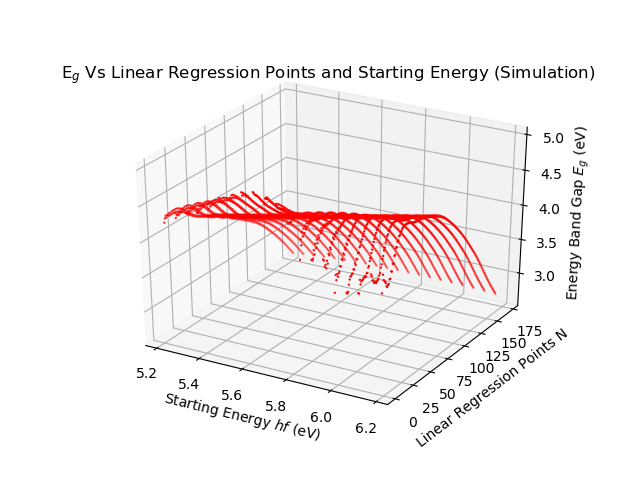

In [23]:
from mpl_toolkits.mplot3d import axes3d
#from matplotlib.pyplot as plt

#Se convierten listas en arreglos para graficar
arr_NumPunReg=np.asarray( arrNumPunReg )
arr_PunIni=np.asarray( arrPunIni )
arr_EneIni=np.asarray( Energia[arrPunIni] )
arr_GabEneOpt=np.asarray( arrGabEneOpt )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#las coordenadas x, y, z son arr_NumPunReg, arr_PunIni y arr_GabEneOpt
ax.scatter(arr_EneIni, arr_NumPunReg, arr_GabEneOpt, c='r', marker='o', s=0.5)#ax.scatter(arr_NumPunReg, arr_EneIni, arr_GabEneOpt, c='r', marker='o', s=0.5)
#Labels de 3 ejes
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=12)
ax.set_xlabel('Starting Energy $hf$ (eV)')#ax.set_xlabel('Linear Regression Points')
ax.set_ylabel('Linear Regression Points N') #'Starting Point'
ax.set_zlabel('Energy Band Gap $E_{g}$ (eV)')
#plt.show()
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_GapEneOptVsPunRegLin_EneInicio"+Tcal+expNom+ZonEneStr+Formato)

# Mapa de contorno de las graficas 
### (Referencia: https://www.geeksforgeeks.org/matplotlib-pyplot-contourf-in-python/):

<IPython.core.display.Javascript object>


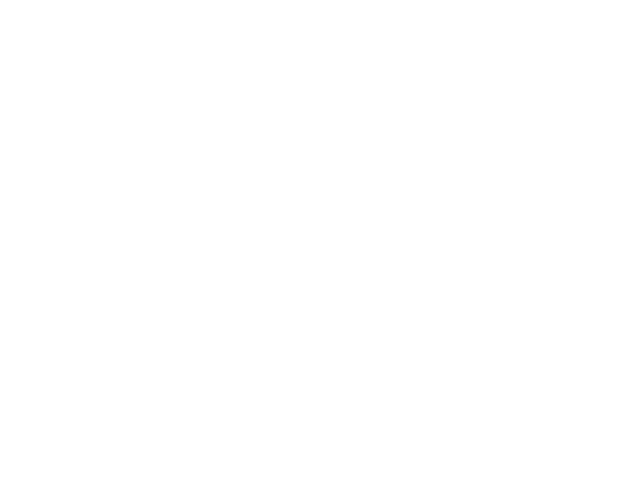

In [12]:
from matplotlib.pyplot import cm
from numpy import ma 
from matplotlib import ticker, cm 

#se convierten listas en arreglos para graficar
arr_NumPunReg=np.asarray( arrNumPunReg )
arr_PunIni=np.asarray( arrPunIni )
arr_EneIni=np.asarray( Energia[arrPunIni] )
arr_GabEneOpt=np.asarray( arrGabEneOpt )

ranNumPunReg=np.linspace(float(numPunRegIni), float(numPun), numPun-numPunRegIni+1) #np.linspace(2.0, float(numPun), numPun-1)
ranNumPunIni=np.linspace(Energia[indPunIni], Energia[indPunIni+numPunIni],  numPunIni)

"""
print("np.shape(ranNumPunReg)=", np.shape(ranNumPunReg), "ranNumPunReg=", ranNumPunReg)
print("np.shape(ranNumPunIni)=", np.shape(ranNumPunIni), "ranNumPunIni=", ranNumPunIni)
print("np.shape(gapEneOpt2D)", np.shape(gapEneOpt2D))
print("gapEneOpt2D=", gapEneOpt2D)
"""

fig = plt.figure()
ax = fig.add_subplot(111)
#las coordenadas x, y, z son arr_NumPunReg, arr_PunIni y arr_GabEneOpt
h = plt.contourf(ranNumPunIni, ranNumPunReg, gapEneOpt2D) 
cbar = plt.colorbar(h)
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=13)
ax.set_xlabel('Linear Regression Starting Energy $hf$ (eV)', size=13)
ax.set_ylabel('Number of Linear Regression Points N', size=13) #'Starting Point'
#ax.set_zlabel('Energy Band Gap (eV)')
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_MapContorno_GabEneOptVsPtsRegLin_EnehfIni_"+Tcal+expNom+ZonEneStr+Formato)

# Calculo desviación estándar y error
#### Es mejor usar np.std() denumpy que satistics.stdev() para arreglos 2D
#### Referencia wireframe https://www.youtube.com/watch?v=Zv9a_wMJMe4 ; https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html; https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html ; https://matplotlib.org/3.1.1/gallery/mplot3d/wire3d.html

In [24]:
#Ejes para plot_wireframe completo
xWire=np.linspace(Energia[indPunIni], Energia[indPunIni+numPunIni],  numPunIni) #np.arange( 2, numPun+1, 1.0 )
yWire=np.linspace(float(numPunRegIni), float(numPun), numPun-numPunRegIni+1) # np.linspace(2.0, float(numPun), numPun-1)
XWire, YWire= np.meshgrid( xWire, yWire ) #Usar sparse=True?

#Funcion que calcula el valor de ajuste lineal en una energia
def ajusLin(ene):
    return ( slopeTaucMejFil*ene )+interceptTaucMejFil

marErr=50.0 #Margen de error para escoger puntos para graf. 3D y desvi. estandar BajEnergias:0.01 Altenergias:18.0;50.0
#Funcion que da los indices menor y mayor en los que |ajuste-rel.Tauc|<=epsilon
def daIndiceIniYFin(a=indTaucFilIni, b=indTaucFilFin, epsilon=marErr):
    #Lista donde van los indices en los que el |ajuste-rel.Tauc|<=epsilon
    indCer=[]
    #For que verifica en que indices |ajuste-rel.Tauc|<=epsilon
    for i in range( a, b ):
        if np.absolute( ajusLin(Energia[i]) - relTauc[i] )<=epsilon:
            indCer.append(i) 
    indCerArr=np.asarray(indCer) #Se vuelve un arreglo
    #Se obtienen el indice mas grande y mas peque(n)o para retornarlos
    indCerArrMax=np.amax(indCerArr)
    indCerArrMin=np.amin(indCerArr)
    return indCerArrMin, indCerArrMax 

#-------------------------------------
#Ejes para plot_wireframe entre rangos
indEneCer_i, indEneCer_f= 0, 0
if ZonEneStr=="BajEnergias":
    indEneCer_i, indEneCer_f=daIndiceIniYFin()
elif ZonEneStr=="AltEnergias":
    indEneCer_i, indEneCer_f=daIndiceIniYFin(a=indTaucIni)
indEneRan_i=indEneCer_i-indPunIni #9
indEneRan_f=indEneCer_f-indPunIni #42
indPunRan_f=indEneRan_f-indEneRan_i
# Para evitar error
indPunRan_i=0
if indPunRan_f>10:
    indPunRan_i=10
else: 
    indPunRan_i=2
"""
indEneCer_i, indEneCer_f=daIndiceIniYFin()
indEneRan_i=indEneCer_i-indPunIni #9
indEneRan_f=indEneCer_f-indPunIni #42
indPunRan_f=indEneRan_f-indEneRan_i
indPunRan_i=10
"""
    
print("La zona anaranjada y azul deben aprecer y tal que la anaranjada este adentro de la azul completamente para que use valores correctos")
print("Por favor ingresar indPunRan_i y indEneRan_i minimo en 0 junto con indPunRan_f y indEneRan_f maximo en", np.shape(gapEneOpt2D))
print("indEneRan_i=",indEneRan_i,"indEneRan_f=",indEneRan_f, "indEneRan_f-indEneRan_i=", indEneRan_f-indEneRan_i)
print("Energia[indPunIni+indEneRan_i]=",Energia[indPunIni+indEneRan_i],"Energia[indPunIni+indEneRan_f]=",Energia[indPunIni+indEneRan_f])
print("OJO: indPunRan_i=",indPunRan_i, "indPunRan_f=",indPunRan_f)
#-------------------------------------
    
ranGapOpt2D=gapEneOpt2D[indPunRan_i:indPunRan_f, indEneRan_i:indEneRan_f] #rango escogido de gapEneOpt2D
xWireRan=np.linspace( Energia[indPunIni+indEneRan_i], Energia[indPunIni+indEneRan_f], indEneRan_f-indEneRan_i )
yWireRan=np.linspace(indPunRan_i, indPunRan_f, indPunRan_f-indPunRan_i)
XWireRan, YWireRan= np.meshgrid( xWireRan, yWireRan )

"""
print( "np.shape(xWire)=", np.shape(xWire), "np.shape(yWire)=", np.shape(yWire), "np.shape(gapEneOpt2D)=", np.shape(gapEneOpt2D) )
print( "np.shape(xWireRan)=", np.shape(xWireRan), "np.shape(yWireRan)=", np.shape(yWireRan), "np.shape(ranGapOpt2D)=", np.shape(ranGapOpt2D) )
print("xWireRan=", xWireRan, "yWireRan=", yWireRan)
#print("ranGapOpt2D=", ranGapOpt2D)
"""

#-----------------------------------------------------------------
#Calculo de media y desviacion estandar en rango
promGapOpt=np.mean(ranGapOpt2D)
sigmaGapOpt=np.std(ranGapOpt2D)
print("promGapOpt +- sigmaGapOpt=", promGapOpt, "+-", sigmaGapOpt)

#-----------------------------------------------------------------

#grafica plot_wireframe
from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XWire, YWire, gapEneOpt2D, rstride=5, cstride=5) #wireframe completo
ax.plot_wireframe(XWireRan, YWireRan, ranGapOpt2D, rstride=3, cstride=3, color="orange") #wireframe rangos
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=12)
ax.set_xlabel('Starting Energy $hf$ (eV)')
ax.set_ylabel('Linear Regression Points N') 
ax.set_zlabel('Energy Band Gap $E_{g}$ (eV)')
#ax.title("Optical Band Gap Selected Lin. Regres. Parameters")?
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_graf3D_GabEneOptVSPtsRegLin_Ene_hf_Inicio_"+Tcal+expNom+ZonEneStr+Formato)

ValueError: zero-size array to reduction operation maximum which has no identity

# Se produce un archivo TXT con los datos necesarios para graficar todas las muestras juntas
### EneVsTauc_t columanas: col0:long onda, col1:AbsorbanciaA, col2:energia$hf$, col3:relTauc
### resRegLin2D_t columnas: col0:coordenasas ajuste lineal2D en x, col1: coordenadas ajuste lineal 2D en y
### resTcalVsEg_desSta: columanas: col0: $T_{cal}$, col1: $E_{g,FilSG}$, col2: $\sigma_{E_{g}3DFilSG}$, col3: $E_{g,3Dprom}$, col 4: $\sigma_{E_{g}3DFilSG}$, col5: $E_{g,lin_r}$, col6_ $\sigma_{E_{g}3DFilSG}$

In [25]:
#TXT relacion Tauc Vs energia
EneVsTauc=np.block([ [absVsLonOnda[indTaucIni:, 0]], [absVsLonOnda[indTaucIni:, 1]], [Energia[indTaucIni:]], [relTauc[indTaucIni:]] ]) #se agrupan los arreglos
EneVsTauc_t=np.transpose(EneVsTauc) #transponer
"""
print("np.shape(EneVsTauc_t)=", np.shape(EneVsTauc_t))
print("Energia[indTaucIni:]=", Energia[indTaucIni:], "[relTauc[indTaucIni:]=", relTauc[indTaucIni:])
print("EneVsTauc=", EneVsTauc)
print("EneVsTauc_t", EneVsTauc_t)
"""
if guardar==False:
    pass
else:
    np.savetxt(Fecha+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+Tcal+expNom+ZonEneStr+".txt", EneVsTauc_t, delimiter='     ') #se guarda en TXT

#TXT ajuste lineal 2D
resRegLin2D=np.block([ [ajuTaucXMejFil], [ajuTaucYMejFil] ])
resRegLin2D_t=np.transpose(resRegLin2D)
if guardar==False:
    pass
else:
    np.savetxt(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+Tcal+expNom+ZonEneStr+".txt", resRegLin2D_t, delimiter='     ') #se guarda en TXT

#TXT Eg Vs Tcal para los dos metodos de 2D y 3D
resTcalVsEg_desSta=[ float(Tcal[:3]), gapOptLinFil, sigmaGapOpt, promGapOpt, sigmaGapOpt, gapOptLin, sigmaGapOpt]
resTcalVsEg_desSta_t=np.transpose(resTcalVsEg_desSta)
if guardar==False:
    pass
else:
    np.savetxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+Tcal+expNom+ZonEneStr+".txt", resTcalVsEg_desSta_t, delimiter='     ') #se guarda en TXT

ValueError: could not convert string to float: 'Sim'

# Se grafica $T_{cal}$ Vs $E_{g}$ con los TXT anteriores producidos ejecutando a mano para cada temperatura de calcinación, por favor hacerlo así, también por favor ejecutarlos todos con la misma $Fecha$

In [26]:
#Se producen arreglos con info. Tcal Vs Eg para exp2_0Baj
TVsEg_400C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp2_0Baj=np.block([ [TVsEg_400C_exp2_0Baj], [TVsEg_425C_exp2_0Baj], [TVsEg_438C_exp2_0Baj], [TVsEg_450C_exp2_0Baj], [TVsEg_475C_exp2_0Baj], [TVsEg_500C_exp2_0Baj] ])
print("TVsEg_exp2_0Baj=", TVsEg_exp2_0Baj)

#---------------------------------------------------------

#Se producen arreglos con info. Tcal Vs Eg para exp0_5Baj
TVsEg_400C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp0_5Baj=np.block([ [TVsEg_400C_exp0_5Baj], [TVsEg_425C_exp0_5Baj], [TVsEg_438C_exp0_5Baj], [TVsEg_450C_exp0_5Baj], [TVsEg_475C_exp0_5Baj], [TVsEg_500C_exp0_5Baj] ])
print("TVsEg_exp0_5Baj=", TVsEg_exp0_5Baj)

#---------------------------------------------------------

#Se producen arreglos con info. Tcal Vs Eg para exp2_0Alt
TVsEg_400C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp2_0Alt=np.block([ [TVsEg_400C_exp2_0Alt], [TVsEg_425C_exp2_0Alt], [TVsEg_438C_exp2_0Alt], [TVsEg_450C_exp2_0Alt], [TVsEg_475C_exp2_0Alt], [TVsEg_500C_exp2_0Alt] ])

#---------------------------------------------------------
#Se producen arreglos con info. Tcal Vs Eg para exp0_5Alt
TVsEg_400C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp0_5Alt=np.block([ [TVsEg_400C_exp0_5Alt], [TVsEg_425C_exp0_5Alt], [TVsEg_438C_exp0_5Alt], [TVsEg_450C_exp0_5Alt], [TVsEg_475C_exp0_5Alt], [TVsEg_500C_exp0_5Alt] ])


OSError: 2021_M9_16__V2O5NoAcu_TcalVsEg_400°Cexp2_0BajEnergias.txt not found.

<IPython.core.display.Javascript object>


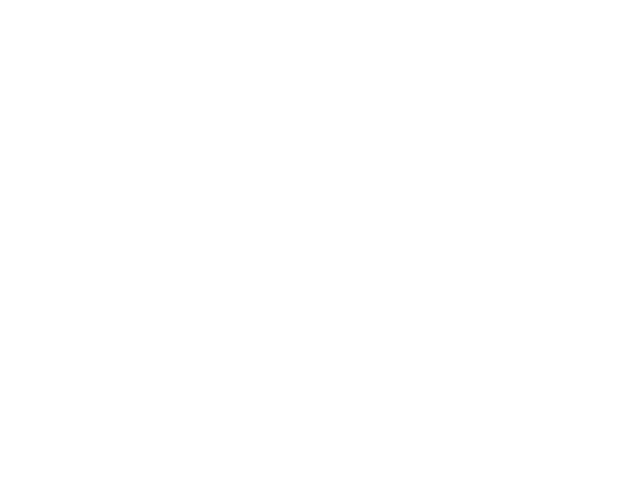

NameError: name 'TVsEg_exp2_0Baj' is not defined

In [27]:
#Se grafica Tcal Vs Eg para exp2_0Baj
plt.figure()
#plt.plot( TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], 'o-' )
#plt.plot( TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], 'o-' , color="orange")
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], yerr=TVsEg_exp2_0Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp2_0"+"BajEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp0_5Baj
plt.figure()
plt.errorbar(TVsEg_exp0_5Baj[:,0], TVsEg_exp0_5Baj[:,1], yerr=TVsEg_exp0_5Baj[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp0_5Baj[:,0], TVsEg_exp0_5Baj[:,3], yerr=TVsEg_exp0_5Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Direct Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp0_5"+"BajEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp2_0Alt
plt.figure()
plt.errorbar(TVsEg_exp2_0Alt[:,0], TVsEg_exp2_0Alt[:,1], yerr=TVsEg_exp2_0Alt[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp2_0Alt[:,0], TVsEg_exp2_0Alt[:,3], yerr=TVsEg_exp2_0Alt[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and High Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp2_0"+"AltEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp0_5Alt
plt.figure()
plt.errorbar(TVsEg_exp0_5Alt[:,0], TVsEg_exp0_5Alt[:,1], yerr=TVsEg_exp0_5Alt[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp0_5Alt[:,0], TVsEg_exp0_5Alt[:,3], yerr=TVsEg_exp0_5Alt[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Direct Allowed Transitions and High Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
if guardar==False:
    plt.show()
else:
    plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp0_5"+"AltEnergias"+Formato)

def calculaGap(Tcal,indTaucIni=137,expRelTauc=2,indLinIni=230,indLinFin=253,numPunAjuLinTauc=10):
    #Trae datos exprimentales de Tcal dada
    absVsLonOnda=np.loadtxt("2019_Mes9_6_V2O5_"+str(Tcal)[:3]+"C_No_acuosa_Abs.csv", skiprows=2, delimiter=";")
    
    #Para lon onda Vs aborbancia A nx2 retornado 1
    lonVsA=np.block([ [absVsLonOnda[indTaucIni:, 0]], [absVsLonOnda[indTaucIni:, 1]] ]) #se agrupan los arreglos
    lonVsA_t=np.transpose(lonVsA) #transponer para retornar 1
    
    #Para energia hf Vs rel. Tauc 2 arreglos
    groRelTauc=1.0 #1.0 es estandar
    Energia=1240.0/absVsLonOnda[:, 0] #Energia hf de la luz
    relTauc=( ( (2.303/groRelTauc)*absVsLonOnda[:, 1])*Energia  )**expRelTauc # relacion de Tauc y Davit Mott
    #Para energia hf Vs rel. Tauc nx2 retornado 2
    EneVsTauc=np.block([ [Energia[indTaucIni:]], [relTauc[indTaucIni:]] ]) #se agrupan los arreglos
    EneVsTauc_t=np.transpose(EneVsTauc) #transponer para retornar 2
     
    #Para reg. lineal x,y mx2 retornado 3 
    from scipy import stats #Para la regresion lineal se importa
    #-----------------------------------------------
    #Las siguientes dos constates con indices deben encerrar la zona de  interes para el ajuste lineal por Tauc Plot
    """
    indLinIni=230 #230 #indice para hacer el ajuste lineal por Tauc Plot INICIAL
    indLinFin=253 #275  #indice para hacer el ajuste lineal por Tauc Plot FINAL
    numPunAjuLinTauc=10
    """    
    """
    marco=1.5 #distancia de borde alrededor regre. lin.
    completo=False #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
    limVerdes=True #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
    numPunAjuLinTauc=10 #numero puntos ajuste lineal para tuac plot
    """
    #-----------------------------------------------

    #PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER AJUSTE LINEAL TAUC PLOT
    indLinIniMej=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
    linTaucXMej=[]
    linTaucYMej=[]
    #variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
    slopeTaucMej=0.0
    interceptTaucMej=0.0
    r_valueTaucMej=0.0 # valor de r para ajuste lineal de relacion de Tauc optimizado el del mejor resultado
    p_valueTaucMej=0.0
    std_errTaucMej=0.0

    for i in range( indLinIni, indLinFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
        linTaucXPos=Energia[i:(i+numPunAjuLinTauc)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
        linTaucYPos=relTauc[i:(i+numPunAjuLinTauc)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
        slopeTaucPos, interceptTaucPos, r_valueTaucPos, p_valueTaucPos, std_errTaucPos = stats.linregress(linTaucXPos, linTaucYPos)

        if i == indLinIni:
            indLinIniMej=i 
            linTaucXMej=linTaucXPos
            linTaucYMej=linTaucYPos
            #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
            slopeTaucMej=slopeTaucPos
            interceptTaucMej=interceptTaucPos
            r_valueTaucMej=r_valueTaucPos
            p_valueTaucMej=p_valueTaucPos
            std_errTaucMej=std_errTaucPos

        elif r_valueTaucPos >= r_valueTaucMej:
            indLinIniMej=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
            linTaucXMej=linTaucXPos
            linTaucYMej=linTaucYPos
            #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
            slopeTaucMej=slopeTaucPos
            interceptTaucMej=interceptTaucPos
            r_valueTaucMej=r_valueTaucPos
            p_valueTaucMej=p_valueTaucPos
            std_errTaucMej=std_errTaucPos

    #Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
    # estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
    ajuTaucXMej=np.linspace(-interceptTaucMej/slopeTaucMej, Energia[indLinIniMej], 1000) #Diosito por mediante mejoralos Danito bello!!!
    ajuTaucYMej=( slopeTaucMej*ajuTaucXMej )+interceptTaucMej
    gapOptLin=-interceptTaucMej/slopeTaucMej
    errStaGap=0.0 #error estandar de Eg
    #Se hace arreglo m x 2 con coord.s de ajuste lineal retornar 3 
    resRegLin2D=np.block([ [ajuTaucXMej], [ajuTaucYMej] ])
    resRegLin2D_t=np.transpose(resRegLin2D)
    #Se hace arreglo 1 x 3 para retornar 4 y unir con np.block varios
    TcalVsEg=[ float(Tcal), gapOptLin, errStaGap ]
    
     
    return lonVsA_t, EneVsTauc_t, resRegLin2D_t, TcalVsEg 

def grafGap(Tcal,indTaucIni=137,expRelTauc=2,marco=1.5,completo=False,limVerdes=True):
    lonVsAGraf, EneVsTaucGraf=CalculaGap(Tcal,indTaucIni=137,expRelTauc=2,indLinIni=230,indLinFin=253,numPunAjuLinTauc=10)
    
    #Se hacen las graficas
    
    

# 2021_M4_7: Se importan datos para gráficar en una misma gráfica las 3 relaciones de Tauc para la simulación compartida por Am Sergio Correal para el V$_{2}$O$_{5}$ con estructura pristina, y con vacancias de óxigeno de 2.5% y 5%

### El elemento de indice 0 (fila 0) de ajuTaucXMejFil de la columna de indice 2 tiene al gap -intercep/slope

In [28]:
#Para V2O5 Simulado de estructura Pristina (como bulk)
EneVsTaucSim=np.block([ [Energia[indTaucIni:]], [relTauc[indTaucIni:]], [ajuTaucXMejFil], [ajuTaucYMejFil] ]) #se agrupan los arreglos 
EneVsTaucSim_t=np.transpose(EneVsTaucSim)
if guardarSimu==False:
    pass
else:
    np.savetxt(Fecha+"_V2O5SimuSergio_relTaucVsEneYAjuLin_"+PorVac[:4]+expNom+ZonEneStr+".txt", EneVsTaucSim_t, delimiter='     ') #se guarda en TXT

### Ahora se traen los TXT producidos anteriormente para hacer la unica gráfica con las 3 realciones de Tauc

In [29]:
#Se producen arreglos con info. rel. Tauc Vs energia para exp2_0MedPristine Structure
EneVsTaucYAjuLin_Prisexp2_0Med=np.loadtxt("2021_M4_5__V2O5SimuSergio_relTaucVsEneYAjuLin_Prisexp2_0MedEnergias.txt", delimiter="     ")
EneVsTaucYAjuLin_2_5Porcexp2_0Baj=np.loadtxt("2021_M4_5__V2O5SimuSergio_relTaucVsEneYAjuLin_2.5%exp2_0BajEnergias.txt", delimiter="     ")
EneVsTaucYAjuLin_5_0Porcexp2_0Baj=np.loadtxt("2021_M4_5__V2O5SimuSergio_relTaucVsEneYAjuLin_5.0%exp2_0BajEnergias.txt", delimiter="     ")

#print("np.shape(EneVsTaucYAjuLin_Prisexp2_0Med)=", np.shape(EneVsTaucYAjuLin_Prisexp2_0Med), "EneVsTaucYAjuLin_Prisexp2_0Med=", EneVsTaucYAjuLin_Prisexp2_0Med)

### Se hace la unica gráfica con las 3 realciones de Tauc

<IPython.core.display.Javascript object>


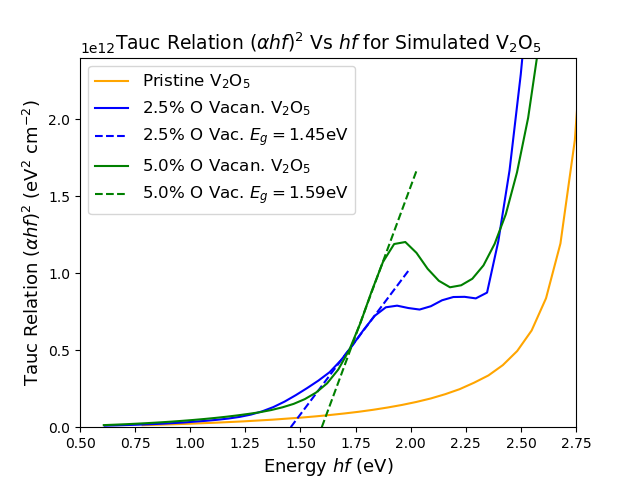

In [30]:
plt.figure()
#Graficas de V2O5 simulado Pristine
plt.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,0], EneVsTaucYAjuLin_Prisexp2_0Med[:,1], color="orange", label="Pristine V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,2], EneVsTaucYAjuLin_Prisexp2_0Med[:,3], '--', color="orange" )#label="Pritine V$_{2}$O$_{5}$ "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_Prisexp2_0Med[0,2]))[:4] 
#Graficas de V2O5 simulado 2.5% de vacacnas de oxigeno
plt.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,1], color="blue", label="2.5% O Vacan. V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,3], '--', color="blue", label="2.5% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_2_5Porcexp2_0Baj[0,2]))[:4]+"eV" )
#Graficas de V2O5 simulado 5.0% de vacacnas de oxigeno
plt.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,1], color="green", label="5.0% O Vacan. V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,3], '--', color="green", label="5.0% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_5_0Porcexp2_0Baj[0,2]))[:4]+"eV" )

plt.xlim(0.5, 2.75)
plt.ylim(0.0, 2.4e12)
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+"2"+r"}$"+" Vs $hf$ for Simulated V$_{2}$O$_{5}$", size=13.5)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc Relation "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0, fontsize="large")
#plt.show()
if guardarSimu==False:
    pass
else:
    plt.savefig("2021_M4_8_V2O5SimuSergio_relTaucVsEneYAjuLin_exp2_0_Pristina2,5%5%.pdf") 

# 2021_M9_17: Comparación simulación DFT con Abs Vs $\lambda$ y metodo de Tauc comparado con gráficas de Tauc experimentales

In [ ]:
# Se traen TXT para graficar rel. Tauc experimentales y sus ajustes lineales
hf_VsTauc_400C_exp2_0Baj=np.loadtxt("2021_M2_18_V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_400°Cexp2_0BajEnergias.txt", delimiter="     ")
hf_VsTauc_438C_exp2_0Baj=np.loadtxt("2021_M2_18_V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_438°Cexp2_0BajEnergias.txt", delimiter="     ")
hf_VsTauc_475C_exp2_0Baj=np.loadtxt("2021_M2_18_V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_475°Cexp2_0BajEnergias.txt", delimiter="     ")
hf_VsTauc_500C_exp2_0Baj=np.loadtxt("2021_M2_18_V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_500°Cexp2_0BajEnergias.txt", delimiter="     ")

RelTaucVsEnergiaRegLin_400C_exp2_0Baj=np.loadtxt("2021_M2_18__V2O5NoAcu_RelTaucVsEnergiaRegLin_400°Cexp2_0BajEnergias.txt", delimiter="     ")
RelTaucVsEnergiaRegLin_438C_exp2_0Baj=np.loadtxt("2021_M2_18__V2O5NoAcu_RelTaucVsEnergiaRegLin_438°Cexp2_0BajEnergias.txt", delimiter="     ")
RelTaucVsEnergiaRegLin_500C_exp2_0Baj=np.loadtxt("2021_M2_18__V2O5NoAcu_RelTaucVsEnergiaRegLin_500°Cexp2_0BajEnergias.txt", delimiter="     ")
RelTaucVsEnergiaRegLin_475C_exp2_0Baj=np.loadtxt("2021_M2_18__V2O5NoAcu_RelTaucVsEnergiaRegLin_475°Cexp2_0BajEnergias.txt", delimiter="     ")

In [ ]:
plt.figure()
#Graficas de V2O5 simulado Pristine
plt.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,0], EneVsTaucYAjuLin_Prisexp2_0Med[:,1], color="orange", label="Pristine V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,2], EneVsTaucYAjuLin_Prisexp2_0Med[:,3], '--', color="orange" )#label="Pritine V$_{2}$O$_{5}$ "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_Prisexp2_0Med[0,2]))[:4] 
#Graficas de V2O5 simulado 2.5% de vacacnas de oxigeno
plt.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,1], color="blue", label="2.5% O Vacan. V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,3], '--', color="blue", label="2.5% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_2_5Porcexp2_0Baj[0,2]))[:4]+"eV" )
#Graficas de V2O5 simulado 5.0% de vacacnas de oxigeno
plt.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,1], color="green", label="5.0% O Vacan. V$_{2}$O$_{5}$" ) #label="Tauc rel. "+PorVac
plt.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,3], '--', color="green", label="5.0% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_5_0Porcexp2_0Baj[0,2]))[:4]+"eV" )

plt.xlim(0.5, 2.75)
plt.ylim(0.0, 2.4e12)
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+"2"+r"}$"+" Vs $hf$ for Simulated V$_{2}$O$_{5}$", size=13.5)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc Relation "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0, fontsize="large")
#plt.show()
if guardarSimu==False:
    pass
else:
    plt.savefig("2021_M9_17_V2O5SimuSergio_relTaucVsEneYAjuLin_exp2_0_Pristina2,5%5%.pdf") 
    
from matplotlib import gridspec
    
fig1 = plt.figure()
spec = gridspec.GridSpec(ncols=1, nrows=1,
                         width_ratios=[1], wspace=0.0,
                         hspace=0.0, height_ratios=[1])
ax1 = fig1.add_subplot(spec[0])
#Graficas de V2O5 simulado 5.0% de vacacnas de oxigeno
ax1.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,1], color="orange" ) #l , label="5.0% O Vacan. V$_{2}$O$_{5}$"
ax1.plot( EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_5_0Porcexp2_0Baj[:,3], '--', color="orange", label="Simul. 5.0% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_5_0Porcexp2_0Baj[0,2]))[:4]+"eV" )
#ax1.set_xlim(1.0, 3.0)
ax1.set_ylim(0.0, 0.002e15)
ax1.set_xlim(1.0, 3.5)
ax1.set_ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", color=(0.0,0.0,0.0), fontsize=15) #fontsize=15.0
ax1.set_xlabel("Energy $hf$ (eV)", fontsize=15)
plt.legend(loc=0)

ax2 = ax1.twinx()
ax2.plot( hf_VsTauc_438C_exp2_0Baj[:,2], hf_VsTauc_438C_exp2_0Baj[:,3], color=(0.0,0.4,1.0) )
ax2.plot( RelTaucVsEnergiaRegLin_438C_exp2_0Baj[:,0], RelTaucVsEnergiaRegLin_438C_exp2_0Baj[:,1], '--', label='Exp 438°C '+r"$E_{g}=$"+(str(RelTaucVsEnergiaRegLin_438C_exp2_0Baj[0,0]))[:4]+"eV" )
ax2.set_xlim(1.0, 3.5)
ax2.set_ylim(0.0, 16.0)

plt.legend(loc=0)
plt.savefig("2021_M9_17_V2O5NoAcuYSimu_relTaucVsEneYAjuLin_exp2_0_438CY5%.png")

fig2 = plt.figure()
spec = gridspec.GridSpec(ncols=1, nrows=1,
                         width_ratios=[1], wspace=0.0,
                         hspace=0.0, height_ratios=[1])
ax3 = fig2.add_subplot(spec[0])
#Graficas de V2O5 simulado 5.0% de vacacnas de oxigeno
ax3.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,0], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,1], color="orange" ) #l , label="5.0% O Vacan. V$_{2}$O$_{5}$"
ax3.plot( EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,2], EneVsTaucYAjuLin_2_5Porcexp2_0Baj[:,3], '--', color="orange", label="Simul. 2.5% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_2_5Porcexp2_0Baj[0,2]))[:4]+"eV" )
#ax1.set_xlim(1.0, 3.0)
ax3.set_ylim(0.0, 0.002e15)
ax3.set_xlim(1.0, 3.5)
ax3.set_ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", color=(0.0,0.0,0.0), fontsize=15) #fontsize=15.0
ax3.set_xlabel("Energy $hf$ (eV)", fontsize=15)
plt.legend(loc=0)

ax4 = ax3.twinx()
ax4.plot( hf_VsTauc_475C_exp2_0Baj[:,2], hf_VsTauc_475C_exp2_0Baj[:,3], color=(0.0,0.4,1.0) )
ax4.plot( RelTaucVsEnergiaRegLin_475C_exp2_0Baj[:,0], RelTaucVsEnergiaRegLin_475C_exp2_0Baj[:,1], '--', label='Exp 475°C '+r"$E_{g}=$"+(str(RelTaucVsEnergiaRegLin_475C_exp2_0Baj[0,0]))[:4]+"eV" )
ax4.set_xlim(1.0, 3.5)
ax4.set_ylim(0.0, 16.0)

plt.legend(loc=0)
plt.savefig("2021_M9_17_V2O5NoAcuYSimu_relTaucVsEneYAjuLin_exp2_0_475CY2_5%.png")

fig3 = plt.figure()
spec = gridspec.GridSpec(ncols=1, nrows=1,
                         width_ratios=[1], wspace=0.0,
                         hspace=0.0, height_ratios=[1])
ax5 = fig3.add_subplot(spec[0])
#Graficas de V2O5 simulado 5.0% de vacacnas de oxigeno
ax5.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,0], EneVsTaucYAjuLin_Prisexp2_0Med[:,1], color="orange") #label="Tauc rel. "+PorVac
#ax5.plot( EneVsTaucYAjuLin_Prisexp2_0Med[:,2], EneVsTaucYAjuLin_Prisexp2_0Med[:,3], '--', color="orange", label="Simul. 2.5% O Vac. "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_Prisexp2_0Baj[0,2]))[:4]+"eV" )#label="Pritine V$_{2}$O$_{5}$ "+r"$E_{g}=$"+(str(EneVsTaucYAjuLin_Prisexp2_0Med[0,2]))[:4] 
ax5.set_ylim(0.0, 0.002e15)
ax5.set_xlim(1.0, 3.5)
ax5.set_ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", color=(0.0,0.0,0.0), fontsize=15) #fontsize=15.0
ax5.set_xlabel("Energy $hf$ (eV)", fontsize=15)
plt.legend(loc=0)

ax6 = ax5.twinx()
ax6.plot( hf_VsTauc_400C_exp2_0Baj[:,2], hf_VsTauc_400C_exp2_0Baj[:,3], color=(0.0,0.4,1.0) )
ax6.plot( RelTaucVsEnergiaRegLin_400C_exp2_0Baj[:,0], RelTaucVsEnergiaRegLin_400C_exp2_0Baj[:,1], '--', label='Exp 400°C '+r"$E_{g}=$"+(str(RelTaucVsEnergiaRegLin_475C_exp2_0Baj[0,0]))[:4]+"eV" )
ax6.set_xlim(1.0, 3.5)
ax6.set_ylim(0.0, 16.0)

plt.legend(loc=0)
plt.savefig("2021_M9_17_V2O5NoAcuYSimu_relTaucVsEneYAjuLin_exp2_0_400CYPristina.png")


